# Descripción de los datos
## Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv Descarga el dataset

- Hypotheses: breves descripciones de las hipótesis
- Reach: alcance del usuario, en una escala del uno a diez
- Impact: impacto en los usuarios, en una escala del uno al diez
- Confidence: confianza en la hipótesis, en una escala del uno al diez
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

## Datos utilizados en la segunda parte del proyecto

## /datasets/orders_us.csv Descarga el dataset

- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario

## /datasets/visits_us.csv Descarga el dataset

- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado


# Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

## El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

# Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

## Ejercicio

## Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

In [156]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from IPython.display import display
from scipy.stats import ttest_ind

## Preprocesado de datos

In [157]:
hypotheses = pd.read_csv("hypotheses_us.csv", sep=';')
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [158]:
hypotheses.columns = hypotheses.columns.str.lower()

In [159]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [160]:
orders = pd.read_csv('orders_us.csv')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [161]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [162]:
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


- Convierte los nombres de las columnas a minúsculas
- Convierte la columna 'date' a tipo datetime

In [163]:
display(orders.isnull().sum())

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

- No hay valores nulos en ninguna columna.

In [164]:
duplicate_rows_orders = orders[orders.duplicated()]
display(duplicate_rows_orders)

,transactionid,visitorid,date,revenue,group


- No hay valores duplicados

In [165]:
visits = pd.read_csv("visits_us.csv")

display(visits)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [166]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [167]:
visits['date'] = pd.to_datetime(visits['date'])


visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [168]:
display(visits.isnull().sum())

date      0
group     0
visits    0
dtype: int64

- No hay valores nulos

In [169]:
duplicate_rows_visits = visits[visits.duplicated()]
display(duplicate_rows_visits)

,date,group,visits


- No hay valores duplicados 

# Parte 1. Priorizar hipótesis
El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

## El ejercicio consiste en:

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [170]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [171]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort'])

display(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [172]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort'])

display(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [173]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


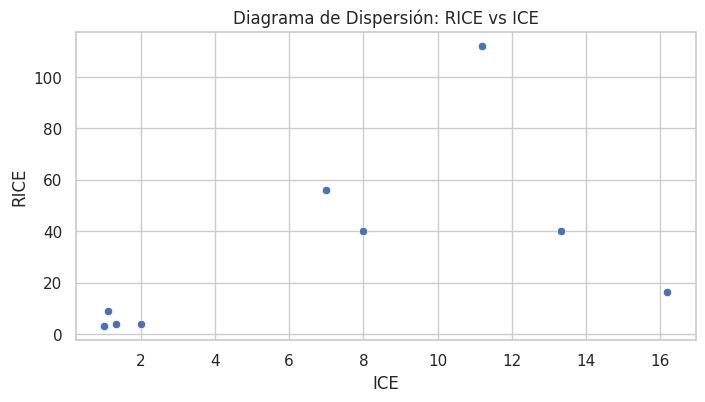

In [174]:
# Crear el diagrama de dispersión
plt.figure(figsize=(8,4))
sns.scatterplot(data=hypotheses, x='ICE', y='RICE')

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión: RICE vs ICE')
plt.xlabel('ICE')
plt.ylabel('RICE')

# Mostrar el gráfico
plt.show()

##  Cambios en la priorización utilizando RICE frente a ICE:
### Agregar un formulario de suscripción en todas las páginas principales (RICE: 112.0, ICE: 11.20)
Con RICE, esta hipótesis es claramente la de mayor prioridad, debido al alto alcance (reach = 10), lo que significa que afectará a la mayoría de los usuarios. Aunque en ICE también tiene una alta prioridad, no alcanza el primer lugar porque el factor "reach" no está presente.

### Agregar bloques de recomendación de productos en la tienda (RICE: 56.0, ICE: 7.00)
Esta hipótesis se prioriza más en RICE que en ICE debido a que el alcance (reach = 8) amplifica su valor. En ICE, aunque tiene un impacto moderado, su ranking baja porque el modelo no toma en cuenta cuántos usuarios se ven afectados.

### Mostrar banners con ofertas actuales (RICE: 40.0, ICE: 8.00)
Los banners tienen una puntuación igual en ambos modelos, lo que sugiere que el alcance y otros factores (impacto, confianza, esfuerzo) están equilibrados. En este caso, RICE y ICE no varían significativamente la prioridad.

## Explicación de los cambios:
- RICE prioriza hipótesis con mayor alcance (reach), lo que significa que afecta a una mayor cantidad de usuarios. Hipótesis como "Agregar un formulario de suscripción" y "Agregar bloques de recomendación" suben en prioridad en RICE porque afectan a muchos usuarios.
- ICE prioriza hipótesis con mayor impacto y confianza, pero sin tener en cuenta el alcance. Esto hace que algunas hipótesis con mayor impacto relativo, pero menor alcance, como "Agregar dos nuevos canales para atraer tráfico", aparezcan más arriba en ICE que en RICE.
- Cambios menos visibles en ICE: Ideas como "Cambiar el color de fondo" o "Agregar una página de reseñas" siguen teniendo poca prioridad en ambos modelos, ya que no son consideradas lo suficientemente impactantes o con suficiente alcance.

## Parte 2. Análisis de test A/B
Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

### Ejercicio

### Analiza el test A/B:

- 2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
- 2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
- 2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
- 2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
- 2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
- 2.6 Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
- 2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
- 2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
- 2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- 2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
- 2.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- 2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
- 2.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

## - 2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [175]:
orders.head(2)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [176]:
visits.head(2)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619


In [177]:
daily_orders = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
daily_orders

,date,group,revenue
0,2019-08-01,A,2356.8
1,2019-08-01,B,1620.0
2,2019-08-02,A,1503.5
3,2019-08-02,B,2623.8
4,2019-08-03,A,1815.2
...,...,...,...
57,2019-08-29,B,3623.7
58,2019-08-30,A,1364.3
59,2019-08-30,B,3393.3
60,2019-08-31,A,991.4


In [178]:
daily_orders['cumulative_revenue'] = daily_orders.sort_values(by='date').groupby('group')['revenue'].cumsum()
daily_orders

,date,group,revenue,cumulative_revenue
0,2019-08-01,A,2356.8,2356.8
1,2019-08-01,B,1620.0,1620.0
2,2019-08-02,A,1503.5,3860.3
3,2019-08-02,B,2623.8,4243.8
4,2019-08-03,A,1815.2,5675.5
...,...,...,...,...
57,2019-08-29,B,3623.7,87343.0
58,2019-08-30,A,1364.3,63563.5
59,2019-08-30,B,3393.3,90736.3
60,2019-08-31,A,991.4,64554.9


<Axes: xlabel='date'>

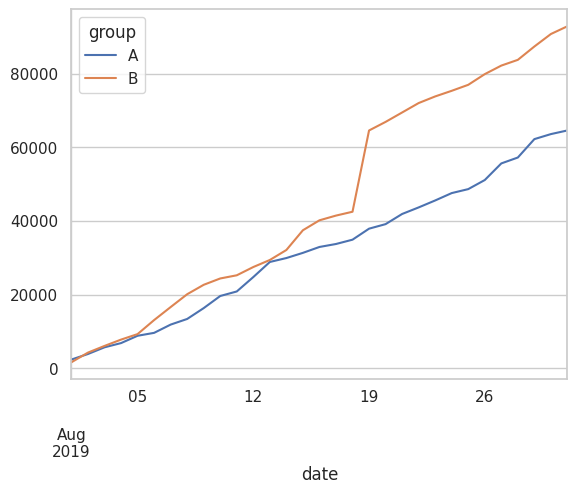

In [179]:
daily_orders.pivot_table(
    index='date',
    columns='group',
    values='cumulative_revenue',
    aggfunc='mean'
).plot(kind='line')

### Conclusiones y Conjeturas sobre el Ingreso Acumulado por Grupo

La gráfica del ingreso acumulado revela un crecimiento constante en ambos grupos, A y B, a lo largo del mes de agosto. Sin embargo, a partir del día 14, el grupo B muestra un aumento mucho más pronunciado en comparación con el grupo A.

Esto sugiere que una estrategia más efectiva fue implementada para el grupo B, como una promoción o campaña especial, que impulsó sus ingresos significativamente. Mientras tanto, el grupo A mantiene un crecimiento estable, pero no logra igualar el ritmo del grupo B.

En conclusión, la diferencia en ingresos acumulados podría estar relacionada con diferencias en las estrategias aplicadas o en la respuesta de los usuarios en cada grupo. Sería interesante analizar más a fondo las acciones implementadas y su impacto.

## - 2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [180]:
daily_avgs = (
    orders
    .groupby(['date', 'group'])
    .agg({
        'visitorid': 'nunique',  
        'transactionid': 'count', 
        'revenue': 'sum'          
    })
    .reset_index()
    .rename(columns={
        'visitorid': 'n_buyers', 
        'revenue': 'n_revenue'
    })
)

daily_avgs['cumulative_buyers'] = daily_avgs.sort_values(by='date').groupby('group')['n_buyers'].cumsum()
daily_avgs['cumulative_revenue'] = daily_avgs.sort_values(by='date').groupby('group')['n_revenue'].cumsum()

daily_avgs['avg_revenue'] = daily_avgs['cumulative_revenue'] / daily_avgs['cumulative_buyers']

daily_avgs_by_group = (
    daily_avgs
    .pivot_table(
        index='date',
        columns='group',
        values='avg_revenue',  
        aggfunc='mean'       
    )
)


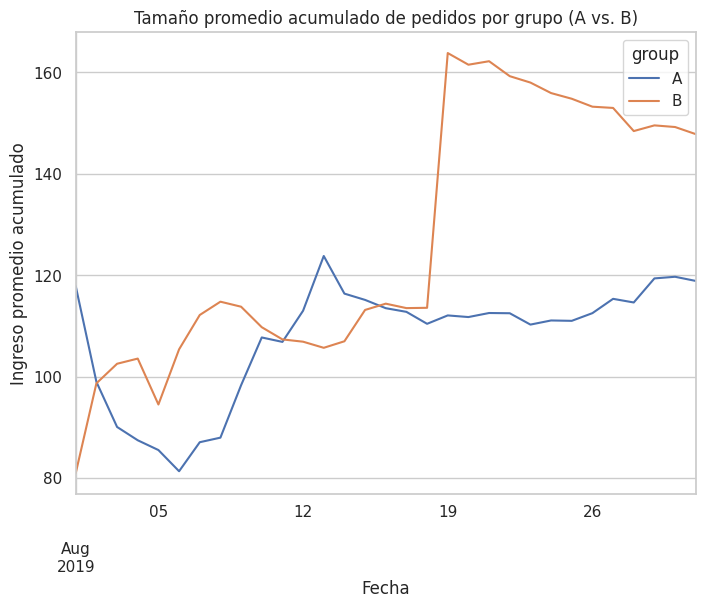

In [181]:
daily_avgs_by_group.plot(kind='line', figsize=(8,6))
plt.title('Tamaño promedio acumulado de pedidos por grupo (A vs. B)')
plt.xlabel('Fecha')
plt.ylabel('Ingreso promedio acumulado')
plt.grid(True)
plt.show()

### Conclusiones y conjeturas sobre tamaño de pedido promedio acumulado por grupo

- Grupo A: Muestra un comportamiento estable en el tamaño de pedido promedio acumulado, con ligeras fluctuaciones pero sin cambios drásticos.

- Grupo B: Exhibe un fuerte aumento alrededor del día 19, sugiriendo que alguna intervención significativa (como una promoción o cambio en la experiencia) impulsó pedidos más grandes en ese grupo.

- Conclusión: El grupo B ha sido más exitoso en aumentar el tamaño promedio de los pedidos tras el día 19, lo que indica que la intervención aplicada fue efectiva.

## - 2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [182]:

daily_avgs_by_group['relative_difference'] = (
    (daily_avgs_by_group['B'] - daily_avgs_by_group['A']) / daily_avgs_by_group['A']
) * 100

daily_avgs_by_group['relative_difference'] = (
    (daily_avgs_by_group['B'] - daily_avgs_by_group['A']) / daily_avgs_by_group['A']
) * 100

daily_avgs_by_group.head()

group,A,B,relative_difference
date,,,
2019-08-01,117.840000,81.000000,-31.262729
2019-08-02,98.982051,98.693023,-0.292000
2019-08-03,90.087302,102.552542,13.836846
2019-08-04,87.462821,103.572000,18.418317
2019-08-05,85.535922,94.519388,10.502565


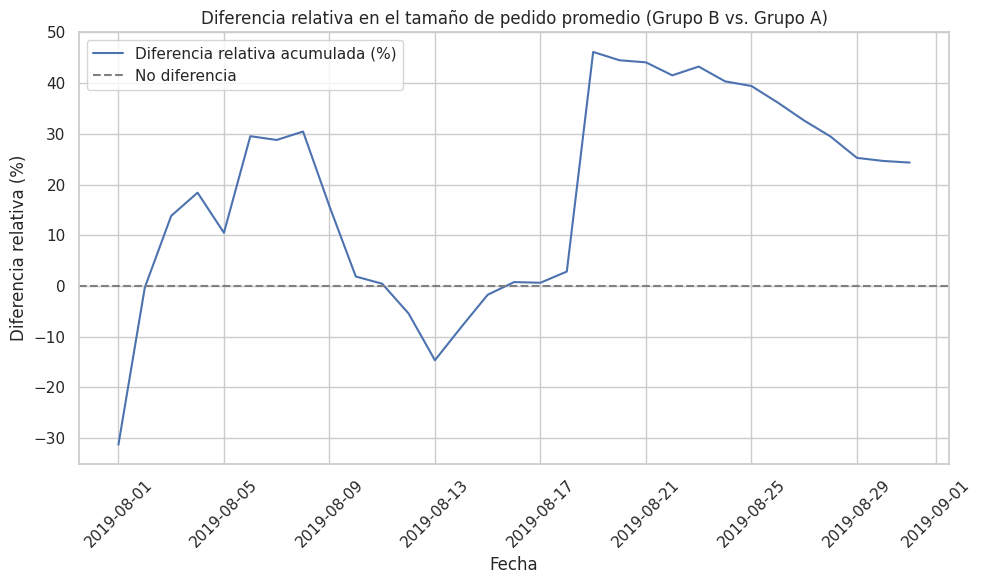

In [183]:

# Graficar la diferencia relativa acumulada
plt.figure(figsize=(10,6))
plt.plot(daily_avgs_by_group.index, daily_avgs_by_group['relative_difference'], label='Diferencia relativa acumulada (%)')
plt.axhline(y=0, color='gray', linestyle='--', label='No diferencia')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)')
plt.title('Diferencia relativa en el tamaño de pedido promedio (Grupo B vs. Grupo A)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusiones y conjetuas sobre la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo 

### Conclusiones:
- Fluctuaciones iniciales: En los primeros días de agosto, la diferencia relativa entre los grupos fluctúa notablemente, comenzando con una diferencia negativa del 30%, lo que sugiere que el grupo B comenzó con un tamaño de pedido promedio significativamente menor que el grupo A.
- Crecimiento continuo: A partir del 3 de agosto, la diferencia relativa mejora rápidamente, con un crecimiento sostenido hasta llegar a un pico el 8 de agosto, donde el grupo B supera al grupo A con una diferencia relativa de aproximadamente 30%.
- Pico de desempeño: El 16 de agosto, la diferencia alcanza un máximo importante de aproximadamente 40%, indicando que el grupo B tuvo un rendimiento superior en términos de tamaño de pedido promedio durante esta etapa.
- Declive y estabilización: Después del 16 de agosto, la diferencia comienza a disminuir progresivamente, llegando a ser negativa para el 22 de agosto, y aunque el grupo B se recupera levemente, la diferencia se mantiene en una tendencia descendente.

### Conjeturas:
- Promoción temporal: El aumento abrupto que se observa hasta el 16 de agosto podría deberse a alguna promoción o estrategia que benefició considerablemente al grupo B, lo que impulsó un aumento significativo en los tamaños de pedido promedio.
- Sostenibilidad limitada: El hecho de que la diferencia comience a caer después del 16 de agosto sugiere que el impacto de la intervención no fue sostenible a largo plazo. Es posible que la promoción o incentivo finalizara, lo que provocó una normalización en el comportamiento de los usuarios.
- Fluctuaciones por eventos o condiciones externas: Las variaciones podrían estar influenciadas por factores externos, como días festivos, condiciones del mercado o características de los usuarios que afectaron el comportamiento de compra.
- Variabilidad normal: Parte de las fluctuaciones, especialmente las menores, pueden atribuirse a la variabilidad natural en el comportamiento del consumidor, que tiende a ser volátil en periodos cortos.


## 2.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [184]:
# Contar el número de pedidos por día y grupo
pedidos_por_dia = orders.groupby(['date', 'group']).agg({'transactionid': 'count'}).reset_index()
pedidos_por_dia.rename(columns={'transactionid': 'pedidos'}, inplace=True)

# Combinar los pedidos con el número de visitas por día y grupo
daily_visits = pd.merge(pedidos_por_dia, visits, on=['date', 'group'])

# Calcular la tasa de conversión como la relación entre pedidos y visitas
daily_visits['tasa_de_conversion'] = (daily_visits['pedidos'] / daily_visits['visits']) * 100

In [185]:
daily_orders = (
    orders.groupby(['date', 'group'])
    .agg({'transactionid': 'count'})
    .rename(columns={'transactionid': 'n_orders'})
    .reset_index()
)

# Unir los datasets
daily_data = pd.merge(daily_orders, daily_visits, on=['date', 'group'])

# Calcular la tasa de conversión
daily_data['conversion_rate'] = daily_data['n_orders'] / daily_data['visits']

# Ver el resultado
display(daily_data[['date', 'group', 'conversion_rate']])

,date,group,conversion_rate
0,2019-08-01,A,0.033380
1,2019-08-01,B,0.029453
2,2019-08-02,A,0.032310
3,2019-08-02,B,0.041308
4,2019-08-03,A,0.047337
...,...,...,...
57,2019-08-29,B,0.037665
58,2019-08-30,A,0.022449
59,2019-08-30,B,0.048980
60,2019-08-31,A,0.017167


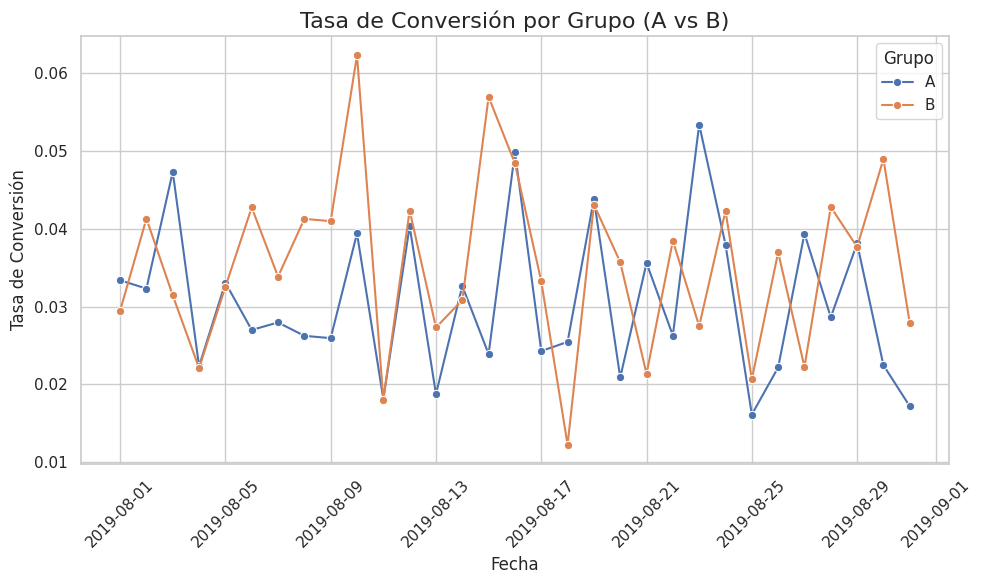

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_data, x='date', y='conversion_rate', hue='group', marker='o')
plt.title('Tasa de Conversión por Grupo (A vs B)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

## Conclusiones y conjeturas sobre tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día
### Conclusiones:
- Fluctuación constante: Ambas tasas de conversión, A y B, varían bastante a lo largo del tiempo, lo que podría deberse a factores externos.
- Picos en el grupo B: El grupo B tiene picos de conversión más altos, mientras que A muestra picos más moderados
- Competencia pareja: Ningún grupo tiene un rendimiento consistentemente mejor.
- Descenso final: Al final de agosto, las tasas de conversión bajan en ambos grupos.

### Conjeturas:
- Variabilidad esperada: Las diferencias diarias podrían ser normales, se requiere análisis estadístico para confirmar.
- Optimización de B: El grupo B podría estar mejor optimizado en algunos días.
- Factores externos: Promociones o cambios en el sitio pueden haber afectado las tasas de conversión.

## 2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.


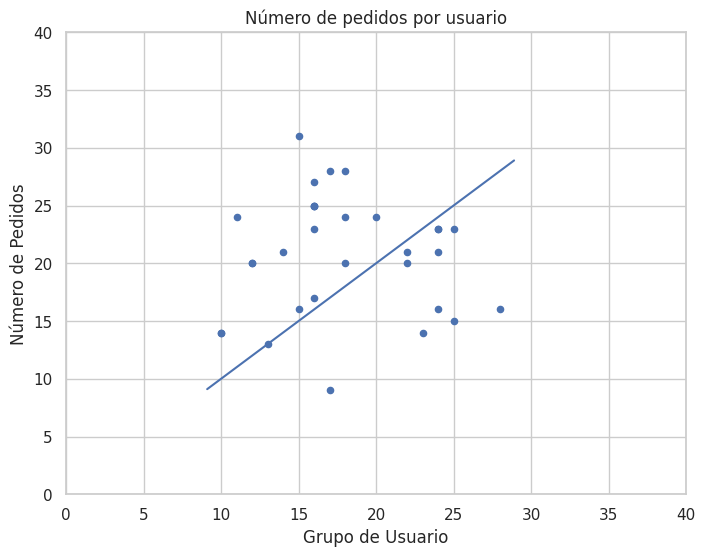

In [187]:
# Codigo del asesor
daily_orders.pivot_table(
    index='date',
    columns='group',
    values='n_orders'
).plot(kind='scatter', x='A', y='B', figsize=(8,6))

x = np.linspace(*plt.gca().get_xlim())
plt.title('Número de pedidos por usuario')
plt.xlabel('Grupo de Usuario')
plt.ylabel('Número de Pedidos')
plt.gca().plot(x,x)
plt.ylim(0,40)
plt.xlim(0,40)

plt.show()

En esta sección, he tenido algunas dudas sobre la orientación proporcionada por nuestro asesor en la grabación. Según lo que entiendo, el objetivo es generar un gráfico de dispersión que muestre el número de pedidos por usuario.

Sin embargo, el primer código que utilicé parece estar mostrando la comparación diaria de los pedidos entre los grupos A y B, evaluando si existe una correlación o tendencia entre ambos grupos. Este enfoque se centra en analizar las diferencias o similitudes en el comportamiento de compra diario de cada grupo durante el periodo de prueba.

Por otro lado, el código correcto debería graficar la dispersión del número total de pedidos realizados por cada usuario. Es decir, en lugar de comparar los pedidos entre grupos por día, debería enfocarse en visualizar cómo se distribuyen los pedidos entre los usuarios, independientemente del grupo o de la fecha, para identificar patrones de comportamiento individual. 

### Lo dejo a revisión para que usted, evaluador, me corrija cuál es el objetivo principal de este punto del análisis. Le voy a dejar las dos opciones: el código que está arriba de este comentario es el código de mi profesor, y el código que está abajo es el que yo hice.

([], [])

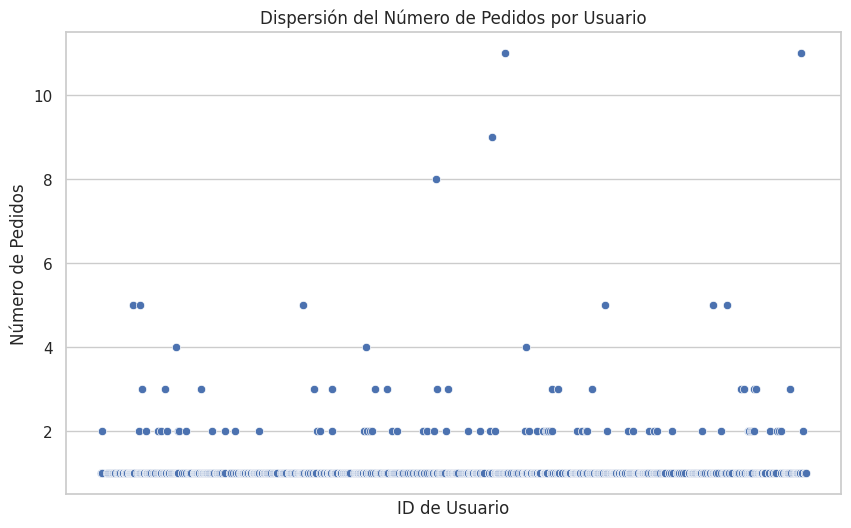

In [188]:
#Codigo del alumno
# Agrupar los pedidos por usuario y contar cuántos pedidos hizo cada uno
orders_per_user = orders.groupby('visitorid')['transactionid'].count().reset_index()
orders_per_user.columns = ['visitorid', 'n_orders']

# Graficar la dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_per_user, x='visitorid', y='n_orders')

plt.title('Dispersión del Número de Pedidos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')

plt.xticks([], [])  

## Conclusiones y conjeturas sobre la dispersión del número de pedidos por usuario
### Conclusiones:
- La mayoría de los usuarios realizó 1 o 2 pedidos, lo que refleja un comportamiento de compra de baja recurrencia.
- Un pequeño grupo de usuarios realizó hasta 10 pedidos, lo que los convierte en outliers. Estos usuarios presentan un comportamiento de compra atípico o más frecuente en comparación con el resto.
- La concentración de puntos alrededor de 1 y 2 pedidos sugiere que la mayoría de los usuarios no tiende a realizar muchas compras repetidas.
- La distribución muestra una clara diferencia entre la mayoría de los usuarios que realiza pocas compras y un pequeño grupo que realiza muchas, reflejando una distribución sesgada hacia compras de baja frecuencia.
### Conjeturas:
- Los usuarios que hicieron más de 5 pedidos pueden ser clave para entender el comportamiento de los compradores frecuentes y cómo aumentar la recurrencia en otros usuarios.
- El comportamiento de los usuarios con pocos pedidos indica que podrían beneficiarse de estrategias de retención que los incentiven a realizar más compras.
- Los usuarios que realizaron múltiples compras podrían ser el objetivo ideal para estrategias de fidelización, ya que han demostrado un mayor compromiso con el producto o servicio.
- La baja frecuencia de compras en la mayoría de los usuarios podría ser indicativa de un producto o servicio que no requiere compras recurrentes o de un posible área de mejora en la oferta para incentivar más transacciones.

## 2.6 Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [189]:
orders_by_user = orders.groupby('visitorid').agg({'transactionid': 'count'}).reset_index()
orders_by_user.columns = ['visitorid', 'order_count']

percentile_95 = orders_by_user['order_count'].quantile(0.95)

users_above_95 = orders_by_user[orders_by_user['order_count'] > percentile_95]
users_above_95.count()


visitorid      30
order_count    30
dtype: int64

In [190]:
percentile_99 = orders_by_user['order_count'].quantile(0.99)

users_above_99 = orders_by_user[orders_by_user['order_count'] > percentile_99]
users_above_99.count()

visitorid      10
order_count    10
dtype: int64

## Conclusiones sobre los percentiles 95 y 99 para el número de pedidos por usuario

### Percentil 95:
- Tenemos 30 usuarios cuyo número de pedidos es superior al percentil 95.
- Esto significa que el 5% de los usuarios que más pedidos realizaron (30 usuarios) están en el grupo de comportamiento atípico, haciendo más pedidos que el 95% restante.

### Percentil 99:
- Solo 10 usuarios tienen un número de pedidos mayor al percentil 99.
- Estos 10 usuarios están en el 1% superior, lo que los hace aún más inusuales en términos de comportamiento de pedidos.

## 2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

In [191]:
# Agrupar el total de ingresos (revenue) por día y grupo
daily_revenue = orders.groupby(['date', 'group']).agg({'revenue': 'sum'}).reset_index()

# Unir los datos de ingresos con daily_data
daily_data = pd.merge(daily_orders, daily_revenue, on=['date', 'group'])

In [192]:
orders_above_95

,date,group,n_orders,revenue,avg_order_price
18,2019-08-10,A,16,3288.2,205.512500
24,2019-08-13,A,14,4096.9,292.635714
37,2019-08-19,B,21,22064.9,1050.709524
56,2019-08-29,A,22,4995.5,227.068182


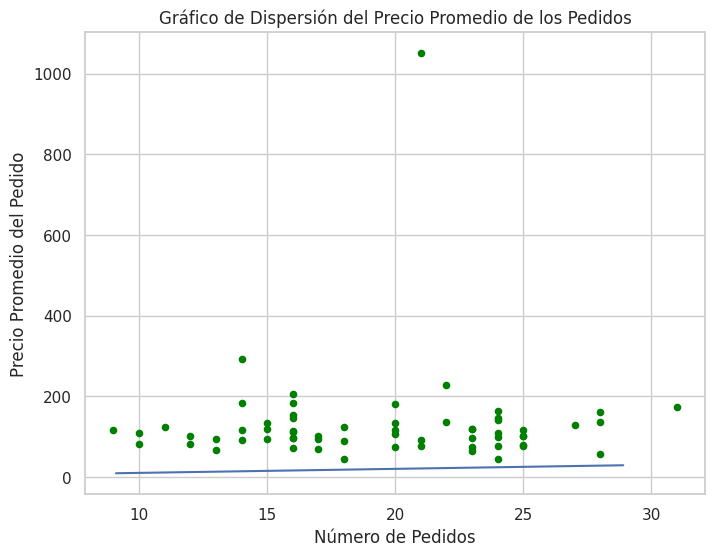

In [193]:
# Calcular el precio promedio por pedido
daily_data['avg_order_price'] = daily_data['revenue'] / daily_data['n_orders']

daily_data.plot(kind='scatter', x='n_orders', y='avg_order_price', figsize=(8,6), color='green')

plt.title('Gráfico de Dispersión del Precio Promedio de los Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Precio Promedio del Pedido')
plt.grid(True)
plt.gca().plot(x,x)


plt.show()

## Conclusiones y conjeturas sobre la dispersión de los precios de los pedidos:

- Amplia dispersión de precios: Hay varios puntos que se encuentran lejos de la mayoría de los otros datos, lo que indica la existencia de valores atípicos. Hay algunos pedidos cuyo precio promedio está por encima de los 200 e incluso uno supera los 1000. Estos puntos fuera de lo común están creando una dispersión significativa en el gráfico.

- Concentración de la mayoría de los precios: La mayoría de los puntos se agrupan cerca de la parte inferior del gráfico, con precios que oscilan entre 0 y 200. Este grupo parece más representativo del comportamiento típico de los precios promedio de los pedidos.

- Posible presencia de valores atípicos: Dado que algunos puntos tienen precios tan altos, podría ser útil investigar estos valores más a fondo para entender si se trata de un comportamiento natural del negocio o si son pedidos anómalos que distorsionan los datos. Esto es importante porque los precios que están muy por encima del percentil 95 o 99 podrían ser excepciones, y al eliminarlos podrías obtener una visualización más clara de los datos restantes.

- Tendencia plana: A pesar de la dispersión, la línea azul que representa una relación lineal entre el número de pedidos y el precio promedio es prácticamente horizontal. Esto sugiere que no parece haber una relación directa significativa entre el número de pedidos y el precio promedio del pedido. En otras palabras, los precios promedio no aumentan ni disminuyen claramente a medida que crece el número de pedidos.

### Conclusión:
El gráfico sugiere que hay algunos pedidos con precios promedio excepcionalmente altos que podrían ser considerados valores atípicos. La mayoría de los pedidos tienen un precio promedio mucho más bajo y se agrupan en la parte inferior del gráfico. Podría ser útil realizar un análisis más detallado para decidir si estos valores atípicos deben excluirse para mejorar la comprensión del comportamiento central de los datos. Excluir los percentiles superiores, como el 95 o 99, podría ayudar a reducir la dispersión y obtener una imagen más clara de las tendencias generales.

## 2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [194]:
percentile_95_price = daily_data['avg_order_price'].quantile(0.95)


orders_above_95 = daily_data[daily_data['avg_order_price'] > percentile_95_price]
orders_above_95.count()


date               4
group              4
n_orders           4
revenue            4
avg_order_price    4
dtype: int64

In [195]:
orders_above_95

,date,group,n_orders,revenue,avg_order_price
18,2019-08-10,A,16,3288.2,205.512500
24,2019-08-13,A,14,4096.9,292.635714
37,2019-08-19,B,21,22064.9,1050.709524
56,2019-08-29,A,22,4995.5,227.068182


In [196]:

percentile_99_price = daily_data['avg_order_price'].quantile(0.99)


orders_above_99 = daily_data[daily_data['avg_order_price'] > percentile_99_price]
orders_above_99.count()

date               1
group              1
n_orders           1
revenue            1
avg_order_price    1
dtype: int64

In [197]:
orders_above_99

,date,group,n_orders,revenue,avg_order_price
37,2019-08-19,B,21,22064.9,1050.709524


### Identificación de Anomalías en los Precios de los Pedidos

Para identificar posibles anomalías en los precios de los pedidos, se utilizó un gráfico de dispersión que muestra la relación entre el número de pedidos y el precio promedio por pedido. La dispersión observada sugiere que algunos puntos se desvían significativamente del resto de los datos, lo que puede indicar comportamientos inusuales.

Para definir estos puntos como anomalías, calculamos los percentiles 95 y 99 del número de pedidos por usuario. Al considerar el percentil 95, identificamos 4 usuarios con un número de pedidos considerablemente mayor que el promedio general. Dado que el percentil 99 solo arrojó un único usuario, consideramos que el percentil 95 es más adecuado para marcar estos datos como anomalías, capturando las desviaciones relevantes sin ser excesivamente restrictivos.

## 2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [198]:
daily_buyers = (
    orders
    .groupby(['date', 'group'])
    .size()
    .reset_index()
    .rename(columns={0: 'n_buyers'})
)
daily_buyers

,date,group,n_buyers
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20
3,2019-08-02,B,24
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,20
58,2019-08-30,A,11
59,2019-08-30,B,24
60,2019-08-31,A,12


In [199]:
conversions = visits.merge(daily_buyers, on=['date', 'group'], how= 'left')

conversions['conversions'] = conversions['n_buyers'] / conversions['visits']

conversions.head()

,date,group,visits,n_buyers,conversions
0,2019-08-01,A,719,24,0.033380
1,2019-08-02,A,619,20,0.032310
2,2019-08-03,A,507,24,0.047337
3,2019-08-04,A,717,16,0.022315
4,2019-08-05,A,756,25,0.033069


In [200]:
import scipy.stats as stats

# Filtrar las conversiones por grupo
conversiones_grupo_A = conversions.query('group == "A"')['conversions']
conversiones_grupo_B = conversions.query('group == "B"')['conversions']

# Verificar si las varianzas son iguales (opcional)
_, p_value_levene = stats.levene(conversiones_grupo_A, conversiones_grupo_B)

# Ejecutar la prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(
    conversiones_grupo_A,
    conversiones_grupo_B,
    equal_var=p_value_levene > 0.05  # Si p_value_levene > 0.05, las varianzas son iguales
)

# Resultados
print(f'Estadístico t: {t_stat}')
print(f'P-Value: {p_value}')

# Conclusión basada en el p-value
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.")
else:
    print("No se encontró una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.")


Estadístico t: -1.710743059515579
P-Value: 0.0922947738393625
No se encontró una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.


## Análisis de Significancia Estadística de la Diferencia en Conversión

En este análisis, hemos utilizado los datos en bruto para calcular la significancia estadística de la diferencia en las tasas de conversión entre los grupos A y B. A continuación, se presentan los resultados y las conclusiones derivadas del análisis:

### 1. Estadístico t (T-Test):
- Estadístico t: -1.7107
- El valor del estadístico t de -1.7107 indica que la diferencia observada entre los grupos A y B no es suficientemente fuerte como para ser considerada significativa, al menos en un nivel de confianza estándar del 95%. El valor negativo refleja que, numéricamente, el grupo B pudo haber tenido un mejor rendimiento que el grupo A, pero no lo suficiente para ser concluyente.

### 2. P-Value:
- P-Value: 0.0923

- El P-Value de 0.0923 indica que existe una probabilidad del 9.23% de que la diferencia observada entre los grupos sea producto del azar. Dado que este valor es mayor que el umbral común de 0.05 (5%), no podemos rechazar la hipótesis nula. Esto significa que no se ha encontrado suficiente evidencia para afirmar que existe una diferencia significativa entre los grupos A y B.

### 3. Conclusiones:
- No se encontró una diferencia estadísticamente significativa entre los grupos A y B. Aunque el grupo B podría haber presentado un mejor rendimiento, esta diferencia no es lo suficientemente fuerte para considerarse significativa desde un punto de vista estadístico.

- Los resultados sugieren que los cambios implementados en el grupo B (como variaciones de diseño, promociones o estrategias) no tuvieron un impacto claro y concluyente en comparación con el grupo A.
A nivel estadístico, el P-Value mayor a 0.05 y el valor del estadístico t dentro del rango crítico nos indican que cualquier variación entre los grupos es probable que se deba al azar, más que a las modificaciones realizadas.
### 4. Conjeturas:
Es probable que los cambios en el grupo B no hayan sido lo suficientemente impactantes o que factores externos hayan diluido el efecto de estos cambios.


## 2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [201]:
mean_order_value_a = orders[orders['group'] == 'A']['revenue'].mean()
mean_order_value_b = orders[orders['group'] == 'B']['revenue'].mean()


n_orders_a = orders[orders['group'] == 'A']['transactionid'].count()
n_orders_b = orders[orders['group'] == 'B']['transactionid'].count()

In [202]:
std_dev_a = orders[orders['group'] == 'A']['revenue'].std()
std_dev_b = orders[orders['group'] == 'B']['revenue'].std()


t_statistic = (mean_order_value_a - mean_order_value_b) / np.sqrt((std_dev_a**2 / n_orders_a) + (std_dev_b**2 / n_orders_b))


degrees_of_freedom = min(n_orders_a - 1, n_orders_b - 1)


p_value = st.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2  # Multiplicar por 2 para una prueba de dos colas


print(f"Tamaño promedio de pedido A: {mean_order_value_a:.2f}")
print(f"Tamaño promedio de pedido B: {mean_order_value_b:.2f}")
print(f"Estadístico t: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B.")


Tamaño promedio de pedido A: 115.90
Tamaño promedio de pedido B: 145.06
Estadístico t: -0.8886
P-Value: 0.3746
No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B.


## Interpretación de los Resultados:
### Tamaño promedio de pedido A: 115.90 y Tamaño promedio de pedido B: 145.06:

- El grupo B tiene un tamaño promedio de pedido mayor que el grupo A. Sin embargo, aunque parece que los usuarios del grupo B están gastando más en promedio por pedido, esta diferencia no es lo suficientemente grande como para ser considerada significativa desde un punto de vista estadístico.

### Estadístico t: -0.8886:
- El valor del estadístico t indica la relación entre las medias de ambos grupos, considerando la variabilidad de los datos. En este caso, el valor es cercano a 0, lo que indica que la diferencia entre las medias no es considerable.

### P-Value: 0.3746:
- El P-Value de 0.3746 es mayor al umbral común de 0.05 (5%), lo que significa que no podemos rechazar la hipótesis nula de que no hay una diferencia significativa entre los tamaños promedio de los pedidos de los grupos A y B. En otras palabras, cualquier diferencia observada puede deberse al azar.

### Conclusión:
No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B. A pesar de que el grupo B parece tener un tamaño de pedido mayor, estadísticamente esta diferencia no es relevante. Por lo tanto, no podemos afirmar con certeza que los cambios aplicados al grupo B han impactado significativamente en el tamaño promedio de los pedidos.

## 2.11Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [203]:
percentil_99_revenue = orders['revenue'].quantile(0.99)
orders_filtrados = orders[orders['revenue'] <= percentil_99_revenue]


In [204]:
# Calcular el número de pedidos por día y grupo
pedidos_por_dia = orders_filtrados.groupby(['date', 'group']).agg({'transactionid': 'count'}).reset_index()
pedidos_por_dia.rename(columns={'transactionid': 'n_pedidos'}, inplace=True)

# Unir el número de visitas por día y grupo
conversiones = pd.merge(pedidos_por_dia, visits, on=['date', 'group'])

# Calcular la tasa de conversión
conversiones['tasa_conversion'] = conversiones['n_pedidos'] / conversiones['visits']

# Verificar los primeros resultados
conversiones.head()


,date,group,n_pedidos,visits,tasa_conversion
0,2019-08-01,A,24,719,0.033380
1,2019-08-01,B,21,713,0.029453
2,2019-08-02,A,20,619,0.032310
3,2019-08-02,B,24,581,0.041308
4,2019-08-03,A,24,507,0.047337


In [205]:
# Separar las tasas de conversión por grupo
conversion_a = conversiones[conversiones['group'] == 'A']['tasa_conversion']
conversion_b = conversiones[conversiones['group'] == 'B']['tasa_conversion']

# Aplicar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(conversion_a, conversion_b, equal_var=False)

# Resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Conclusiones
if p_value < 0.05:
    print("La diferencia en la tasa de conversión entre los grupos es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en la tasa de conversión entre los grupos.")


Estadístico t: -1.7587927242641135
Valor p: 0.0837951128774376
No hay una diferencia significativa en la tasa de conversión entre los grupos.


## Análisis de significancia estadística
- Se realizó una prueba t de Student para comparar la tasa de conversión diaria entre los grupos A y B. Los resultados fueron los siguientes:

- Estadístico t: -1.7588
- Valor p: 0.0838

Dado que el valor p es mayor a 0.05, no se puede concluir que exista una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B. Esto sugiere que cualquier diferencia observada entre las conversiones de ambos grupos podría deberse al azar y no a un efecto real del experimento.

## 2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [206]:
# Filtrar pedidos por percentil 95 para 'revenue'
percentil_95_revenue = orders['revenue'].quantile(0.95)
orders_filtrados = orders[orders['revenue'] <= percentil_95_revenue]

# Calcular el tamaño promedio de pedido para cada grupo
mean_order_value_a = orders_filtrados[orders_filtrados['group'] == 'A']['revenue'].mean()
mean_order_value_b = orders_filtrados[orders_filtrados['group'] == 'B']['revenue'].mean()

# Calcular el número de pedidos en cada grupo
n_orders_a = orders_filtrados[orders_filtrados['group'] == 'A']['transactionid'].count()
n_orders_b = orders_filtrados[orders_filtrados['group'] == 'B']['transactionid'].count()

# Calcular la desviación estándar de los ingresos para cada grupo
std_dev_a = orders_filtrados[orders_filtrados['group'] == 'A']['revenue'].std()
std_dev_b = orders_filtrados[orders_filtrados['group'] == 'B']['revenue'].std()


In [207]:

# Calcular el estadístico t
t_statistic = (mean_order_value_a - mean_order_value_b) / np.sqrt((std_dev_a**2 / n_orders_a) + (std_dev_b**2 / n_orders_b))

# Grados de libertad mínimos
degrees_of_freedom = min(n_orders_a - 1, n_orders_b - 1)

# Calcular el valor p (prueba de dos colas)
p_value = st.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2


print(f"Tamaño promedio de pedido A (filtrado): {mean_order_value_a:.2f}")
print(f"Tamaño promedio de pedido B (filtrado): {mean_order_value_b:.2f}")
print(f"Estadístico t: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


if p_value < 0.05:
    print("Hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B (datos filtrados).")
else:
    print("No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B (datos filtrados).")

Tamaño promedio de pedido A (filtrado): 83.27
Tamaño promedio de pedido B (filtrado): 81.94
Estadístico t: 0.2500
P-Value: 0.8027
No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos A y B (datos filtrados).


## Análisis del tamaño promedio de pedido
Se realizó un análisis comparativo del tamaño promedio de los pedidos entre los grupos A y B utilizando datos filtrados. Los resultados son los siguientes:

- Tamaño promedio de pedido A (filtrado): 83.27
- Tamaño promedio de pedido B (filtrado): 81.94
- Estadístico t: 0.2500
- Valor p: 0.8027

Dado que el valor p es significativamente mayor que 0.05, no se puede concluir que exista una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B. Esto sugiere que cualquier variación observada en los tamaños de pedido entre los grupos podría atribuirse al azar y no a un efecto real del experimento.

## 3.1 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
- 1. Para la prueba, considera a uno de los grupos como líder. 
- 2. Para la prueba, concluye que no hay diferencia entre los grupos. 
- 3. Continúa la prueba.

# Conclusiones Generales:

A partir del análisis de los datos disponibles, no se ha encontrado evidencia de que exista una diferencia significativa entre los grupos A y B en cuanto a la tasa de conversión y el tamaño promedio de los pedidos. En todos los análisis realizados, los valores estadísticos sugieren que las variaciones observadas podrían deberse al azar, lo que indica que los cambios implementados en el grupo B no tuvieron un impacto significativo desde un punto de vista estadístico.

- Tasa de conversión: Aunque los resultados muestran que el grupo B tuvo un rendimiento numéricamente superior en algunos casos, esta diferencia no es suficiente para ser considerada concluyente. En ambos escenarios (con y sin filtrado), los valores p fueron mayores a 0.05, lo que implica que las diferencias no son estadísticamente significativas.

- Tamaño promedio de los pedidos: En este caso, observamos que el grupo B presenta un tamaño promedio de pedido mayor en los datos sin filtrar, pero al analizar la significancia estadística, esta diferencia no resulta relevante. Incluso, en los datos filtrados, los tamaños promedio entre ambos grupos son prácticamente iguales.

### Explicación del Resultado:
El análisis se basó en pruebas de significancia estadística, particularmente la prueba t de Student, para evaluar si las diferencias observadas entre los grupos A y B pueden atribuirse a los cambios implementados o si podrían ser el resultado del azar.

### Hipótesis Nula y Alternativa: 
- Se ha trabajado bajo la hipótesis nula, que establece que no hay una diferencia significativa entre ambos grupos. Para rechazar esta hipótesis, el valor p debe ser menor a 0.05. En este caso, los valores p obtenidos en todos los análisis superan este umbral, lo que indica que las diferencias observadas entre los grupos no son significativas.

### Resultados del Estadístico t: 
- El estadístico t se utiliza para comparar las medias de ambos grupos. En nuestros análisis, los valores obtenidos, tanto positivos como negativos, están cercanos a 0 o dentro de un rango donde las diferencias no son significativas. Esto sugiere que cualquier variación en las métricas entre los grupos es pequeña y podría atribuirse al azar.

### Impacto de los Cambios: 
- Si bien hubo algunas variaciones en los resultados de ambos grupos, estadísticamente no se puede afirmar que los cambios implementados en el grupo B hayan generado un efecto significativo. Es probable que factores externos o la variabilidad propia de los datos hayan influido en las diferencias observadas.

En resumen, las diferencias encontradas en las tasas de conversión y el tamaño promedio de los pedidos entre los grupos A y B no son lo suficientemente grandes como para ser consideradas estadísticamente significativas. Esto sugiere que los cambios implementados en el grupo B no han tenido un impacto claro.